In [1]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [2]:
 df = pd.read_csv('movies.csv')

In [ ]:
df.head()

In [4]:
#Checking for null values

for col in df.columns:
    num_null = df[col].isna().sum()
    print('{} : {}'.format(col, num_null))

name : 0
rating : 77
genre : 0
year : 0
released : 2
score : 3
votes : 3
director : 0
writer : 3
star : 1
country : 3
budget : 2171
gross : 189
company : 17
runtime : 4


In [5]:
df.isna().any()

name        False
rating       True
genre       False
year        False
released     True
score        True
votes        True
director    False
writer       True
star         True
country      True
budget       True
gross        True
company      True
runtime      True
dtype: bool

In [6]:
#Checking for data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

### Working with the bugdet and gross columns

Replacing the null values with the average of the column

In [7]:
mean = df['budget'].mean()
df['budget'] = df['budget'].fillna(mean)

In [8]:
mean = df['gross'].mean()
df['gross'] = df['gross'].fillna(mean)

Changing the data type of both columns to int64

In [9]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [10]:
#confirming that the cell doesn't contain any null values

df['budget'].isna().sum()

0

In [ ]:
df.head()

In [14]:
df = df.sort_values(by=['gross'], inplace=False, ascending = False)

###  Checking for the correlation between budget & gross using a scatterplot

In [ ]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.xlabel('Budget for the film')
plt.ylabel('Gross Earnings')
plt.title('Budget vs Gross\n')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

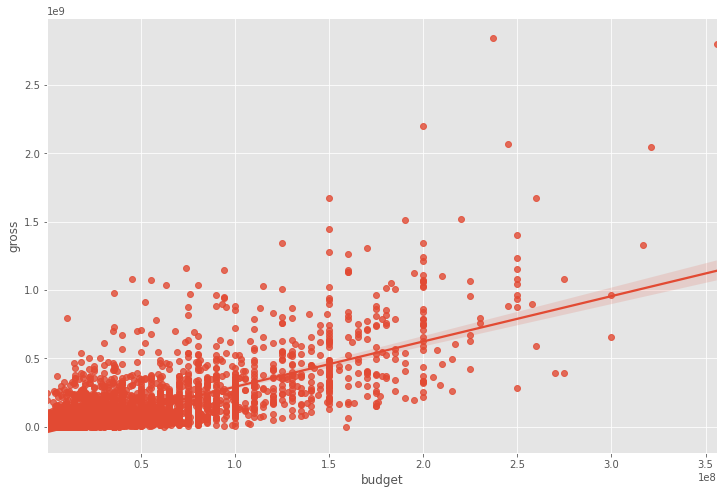

In [24]:
# plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df)

<AxesSubplot:xlabel='budget', ylabel='gross'>

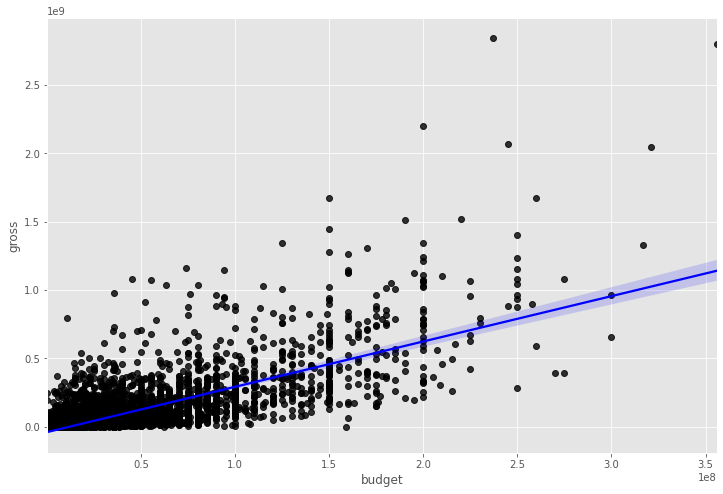

In [25]:
# formatting the regplot 

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'black'}, line_kws={'color':'blue'})

In [26]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.265578,0.252042,0.120811
score,0.097995,1.000000,0.409182,0.064554,0.182868,0.399451
votes,0.222945,0.409182,1.000000,0.421090,0.628713,0.309212
budget,0.265578,0.064554,0.421090,1.000000,0.711270,0.265305
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,0.120811,0.399451,0.309212,0.265305,0.241336,1.000000


<p><strong> We have different types of correlation: <p/strong></p>
    
We have the Pearson, which is the default, the kendall and the spearman.

### We can visualize this correlation between variables by using the heatmap

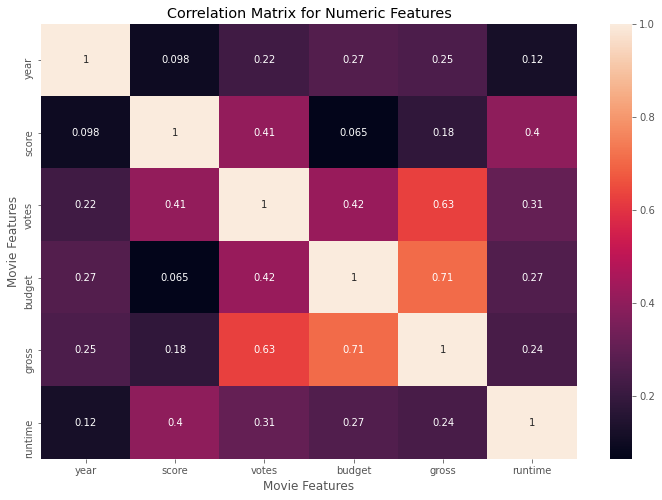

In [28]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot =True)

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.title('Correlation Matrix for Numeric Features')

plt.show()

We can also unstack the correlation matrix to see it clearly!

In [30]:
corr_matrix = df.corr()

corr_matrix = corr_matrix.unstack()

corr_matrix

year     year       1.000000
         score      0.097995
         votes      0.222945
         budget     0.265578
         gross      0.252042
         runtime    0.120811
score    year       0.097995
         score      1.000000
         votes      0.409182
         budget     0.064554
         gross      0.182868
         runtime    0.399451
votes    year       0.222945
         score      0.409182
         votes      1.000000
         budget     0.421090
         gross      0.628713
         runtime    0.309212
budget   year       0.265578
         score      0.064554
         votes      0.421090
         budget     1.000000
         gross      0.711270
         runtime    0.265305
gross    year       0.252042
         score      0.182868
         votes      0.628713
         budget     0.711270
         gross      1.000000
         runtime    0.241336
runtime  year       0.120811
         score      0.399451
         votes      0.309212
         budget     0.265305
         gross